![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]()

This notebook will cover the different parameters and usages of `T5Transformer` annotator in Spark NLP. 

**📖 Learning Objectives:**

1. Understand the concept of the Text-To-Text Transfer Transformer, T5.

2. Understand the different kind of tasks with T5, such as Question Answering and Summarization

3. Become comfortable using the different parameters of the annotator.


**🔗 Helpful Links:**

- Documentation : <ul class="simple">
<li><p><a class="reference external" href="https://ai.googleblog.com/2020/02/exploring-transfer-learning-with-t5.html">Exploring Transfer Learning with T5: the Text-To-Text Transfer
Transformer</a></p></li>
<li><p><a class="reference external" href="https://arxiv.org/abs/1910.10683">Exploring the Limits of Transfer Learning with a Unified Text-to-Text
Transformer</a></p></li>
<li><p><a class="github reference external" href="https://github.com/google-research/text-to-text-transfer-transformer">google-research/text-to-text-transfer-transformer</a></p></li>
<li><p><a class="JSL Transformers" href="https://nlp.johnsnowlabs.com/docs/en/transformers">Transformers on John Snow Labs webpage</a></p></li>
</ul>


- Python Docs : [T5Transformer](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/seq2seq/t5_transformer/index.html)

- Scala Docs : [T5Transformer](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/annotators/seq2seq/T5Transformer.html)

- For extended examples of usage, see the [Spark NLP Workshop repository](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/).

## **📜 Background**

**T5** (Text-To-Text Transfer Transformer) is able to use the same model, loss function, and hyper-parameters on any NLP task, including machine translation, document summarization, question answering, and classification tasks (e.g., sentiment analysis). T5 can even apply to regression tasks by training it to predict the string representation of a number instead of the number itself.

The model was proposed by [Google researchers in 2020](https://arxiv.org/abs/1910.10683), and is able to perform 17 different NLP tasks with the same model.From the original paper: 

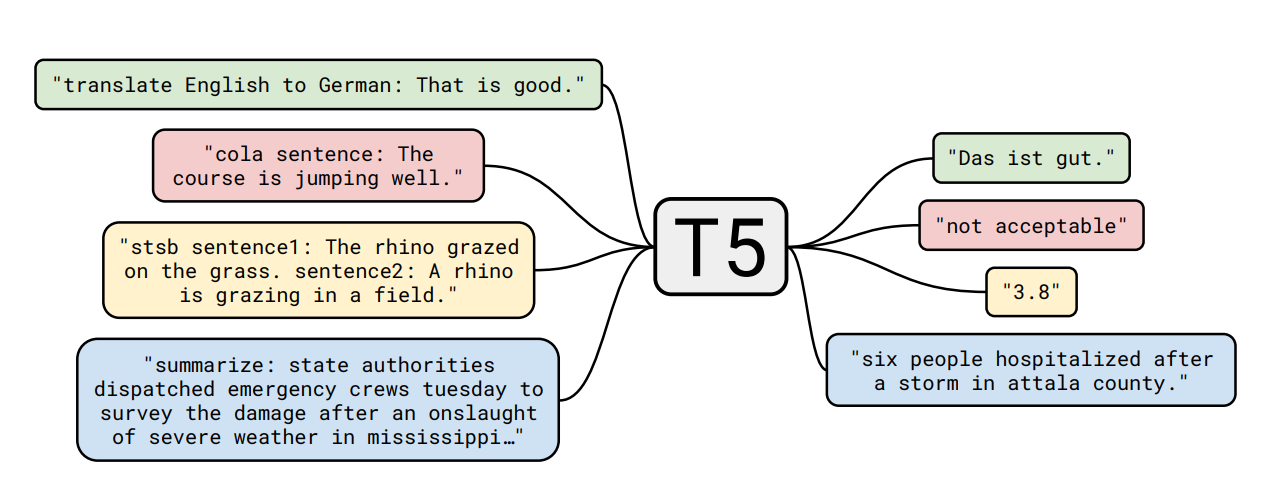

The tasks are the following:

|Task Name | Explanation | 
|----------|--------------|
|[1.CoLA](https://nyu-mll.github.io/CoLA/)                   | Classify if a sentence is gramaticaly correct|
|[2.RTE](https://dl.acm.org/doi/10.1007/11736790_9)                    | Classify whether if a statement can be deducted from a sentence|
|[3.MNLI](https://arxiv.org/abs/1704.05426)                   | Classify for a hypothesis and premise whether they contradict or contradict each other or neither of both (3 class).|
|[4.MRPC](https://www.aclweb.org/anthology/I05-5002.pdf)                   | Classify whether a pair of sentences is a re-phrasing of each other (semantically equivalent)|
|[5.QNLI](https://arxiv.org/pdf/1804.07461.pdf)                   | Classify whether the answer to a question can be deducted from an answer candidate.|
|[6.QQP](https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs)                    | Classify whether a pair of questions is a re-phrasing of each other (semantically equivalent)|
|[7.SST2](https://www.aclweb.org/anthology/D13-1170.pdf)                   | Classify the sentiment of a sentence as positive or negative|
|[8.STSB](https://www.aclweb.org/anthology/S17-2001/)                   | Classify the sentiment of a sentence on a scale from 1 to 5 (21 Sentiment classes)|
|[9.CB](https://ojs.ub.uni-konstanz.de/sub/index.php/sub/article/view/601)                     | Classify for a premise and a hypothesis whether they contradict each other or not (binary).|
|[10.COPA](https://www.aaai.org/ocs/index.php/SSS/SSS11/paper/view/2418/0)                   | Classify for a question, premise, and 2 choices which choice the correct choice is (binary).|
|[11.MultiRc](https://www.aclweb.org/anthology/N18-1023.pdf)                | Classify for a question, a paragraph of text, and an answer candidate, if the answer is correct (binary),|
|[12.WiC](https://arxiv.org/abs/1808.09121)                    | Classify for a pair of sentences and a disambigous word if the word has the same meaning in both sentences.|
|[13.WSC/DPR](https://www.aaai.org/ocs/index.php/KR/KR12/paper/view/4492/0)       | Predict for an ambiguous pronoun in a sentence what it is referring to.  |
|[14.Summarization](https://arxiv.org/abs/1506.03340)          | Summarize text into a shorter representation.|
|[15.SQuAD](https://arxiv.org/abs/1606.05250)                  | Answer a question for a given context.|
|[16.WMT1.](https://arxiv.org/abs/1706.03762)                  | Translate English to German|
|[17.WMT2.](https://arxiv.org/abs/1706.03762)                   | Translate English to French|
|[18.WMT3.](https://arxiv.org/abs/1706.03762)                   | Translate English to Romanian|





The default model is `"t5_small"`. For available pretrained models please see the [Models Hub](https://nlp.johnsnowlabs.com/models). 

In this video, we will explore only two tasks: `Question Answering` and `Summarization`. For detailed explanation of every available task, consult [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/10.1_T5_Workshop_with_Spark_NLP.ipynb).

> **Notes:** This is a very computationally expensive module especially on larger sequences. The use of an accelerator such as GPU is recommended.

#### **🎬 Colab Setup**

In [1]:
!pip install -q pyspark==3.3.0  spark-nlp==4.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.4/453.4 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.1 MB/s eta 0:00:00


In [2]:
import sparknlp
from sparknlp.base import DocumentAssembler, Pipeline
from sparknlp.annotator import T5Transformer


spark = sparknlp.start()

print("Spark NLP version: ", sparknlp.version())
print("Apache Spark version: ", spark.version)

spark

Spark NLP version:  4.2.5
Apache Spark version:  3.3.0


## **🖨️ Input/Output Annotation Types**

- Input: `DOCUMENT`

- Output: `DOCUMENT`

## **🔎 Parameters**

<dd class="field-odd"><dl>
<dt><strong>configProtoBytes</strong></dt><dd><p>ConfigProto from tensorflow, serialized into byte array.</p>
</dd>
<dt><strong>task</strong></dt><dd><p>Transformer’s task, e.g. <code class="docutils literal notranslate"><span class="pre">summarize:</span></code></p>
</dd>
<dt><strong>minOutputLength</strong></dt><dd><p>Minimum length of the sequence to be generated</p>
</dd>
<dt><strong>maxOutputLength</strong></dt><dd><p>Maximum length of output text</p>
</dd>
<dt><strong>doSample</strong></dt><dd><p>Whether or not to use sampling; use greedy decoding otherwise</p>
</dd>
<dt><strong>temperature</strong></dt><dd><p>The value used to module the next token probabilities</p>
</dd>
<dt><strong>topK</strong></dt><dd><p>The number of highest probability vocabulary tokens to keep for
top-k-filtering</p>
</dd>
<dt><strong>topP</strong></dt><dd><p>Top cumulative probability for vocabulary tokens</p>
<p>If set to float &lt; 1, only the most probable tokens with probabilities
that add up to <code class="docutils literal notranslate"><span class="pre">topP</span></code> or higher are kept for generation.</p>
</dd>
<dt><strong>repetitionPenalty</strong></dt><dd><p>The parameter for repetition penalty. 1.0 means no penalty.</p>
</dd>
<dt><strong>noRepeatNgramSize</strong></dt><dd><p>If set to int &gt; 0, all ngrams of that size can only occur once</p>
</dd>

</dd>
</dl>
</dd>
</dl>

In [3]:
documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document") 

# Can take in document or sentence columns
t5 = T5Transformer.pretrained(name='t5_base', lang='en')\
    .setInputCols('document')\
    .setOutputCol("T5")

t5_base download started this may take some time.
Approximate size to download 451.8 MB
[OK!]


In [4]:
t5.extractParamMap()

{Param(parent='T5TRANSFORMER_8078c2d39352', name='batchSize', doc='Size of every batch'): 1,
 Param(parent='T5TRANSFORMER_8078c2d39352', name='doSample', doc='Whether or not to use sampling; use greedy decoding otherwise'): False,
 Param(parent='T5TRANSFORMER_8078c2d39352', name='engine', doc='Deep Learning engine used for this model'): 'tensorflow',
 Param(parent='T5TRANSFORMER_8078c2d39352', name='ignoreTokenIds', doc="A list of token ids which are ignored in the decoder's output"): [],
 Param(parent='T5TRANSFORMER_8078c2d39352', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='T5TRANSFORMER_8078c2d39352', name='minOutputLength', doc='Minimum length of the sequence to be generated'): 0,
 Param(parent='T5TRANSFORMER_8078c2d39352', name='noRepeatNgramSize', doc='If set to int > 0, all ngrams of that size can only occur once'): 0,
 Param(parent='T5TRANSFORMER_8078c2d39352', name='repetitionPenalty', doc='The parameter for

### 🔎 **setTask()**: Sets the transformer’s task, e.g. summarize.

To answer questions, we use the task [SQuAD - Context based question answering](https://arxiv.org/abs/1606.05250), and set the task in the annotator as `.setTask("question:")`.

This task can perform both _Closed Book_ question answering (answer without context) and _Open Book_ question answering (provide a context for the model to use to answer the question). 

In [5]:
# Set the task for questions on T5.
t5.setTask('question:')

T5TRANSFORMER_8078c2d39352

Closed Book question answering: Make questions!

In [6]:
# Build pipeline with T5
pipeline = Pipeline().setStages( [documentAssembler,t5])

# define Data
data = [["Who is president of Nigeria? "],
        ["What is the most common language in India? "],
        ["What is the capital of Germany? "],]

df=spark.createDataFrame(data).toDF('text')

#Predict on text data with T5
model = pipeline.fit(df)
annotated_df = model.transform(df)
annotated_df.select(['text','t5.result']).show(truncate=False)

+-------------------------------------------+------------------+
|text                                       |result            |
+-------------------------------------------+------------------+
|Who is president of Nigeria?               |[Muhammadu Buhari]|
|What is the most common language in India? |[English]         |
|What is the capital of Germany?            |[Berlin]          |
+-------------------------------------------+------------------+



The answers will be provided based on the existing knowledge of the model without any extra help. 

To perform Open Book question answering, we need to construct the data in the following format:

```python

example = """question: What is the language spoken in Brazil? context: Brazil is the biggest country in south america, and the official language is Portuguese"""

```

We added two delimiters: `question:` and `context:` that will be used internally.

In [7]:
data = [
    ["question: What does increased oxygen concentrations in the patient’s lungs displace? context: Hyperbaric (high-pressure) medicine uses special oxygen chambers to increase the partial pressure of O 2 around the patient and, when needed, the medical staff. Carbon monoxide poisoning, gas gangrene, and decompression sickness (the ’bends’) are sometimes treated using these devices. Increased O 2 concentration in the lungs helps to displace carbon monoxide from the heme group of hemoglobin. Oxygen gas is poisonous to the anaerobic bacteria that cause gas gangrene, so increasing its partial pressure helps kill them. Decompression sickness occurs in divers who decompress too quickly after a dive, resulting in bubbles of inert gas, mostly nitrogen and helium, forming in their blood. Increasing the pressure of O 2 as soon as possible is part of the treatment."],
    ["What did Joey eat for breakfast? context: Once upon a time, there was a squirrel named Joey. Joey loved to go outside and play with his cousin Jimmy. Joey and Jimmy played silly games together, and were always laughing. One day, Joey and Jimmy went swimming together 50 at their Aunt Julie’s pond. Joey woke up early in the morning to eat some food before they left. Usually, Joey would eat cereal, fruit (a pear), or oatmeal for breakfast. After he ate, he and Jimmy went to the pond. On their way there they saw their friend Jack Rabbit. They dove into the water and swam for several hours. The sun was out, but the breeze was cold. Joey and Jimmy got out of the water and started walking home. Their fur was wet, and the breeze chilled them. When they got home, they dried off, and Jimmy put on his favorite purple shirt. Joey put on a blue shirt with red and green dots. The two squirrels ate some food that Joey’s mom, Jasmine, made and went off to bed."]
]

df = spark.createDataFrame(data).toDF('text')

model.transform(df).select(['t5.result']).show(truncate=False)


+------------------------------------+
|result                              |
+------------------------------------+
|[carbon monoxide]                   |
|[cereal, fruit (a pear), or oatmeal]|
+------------------------------------+



Now let's see how to summarize texts.

In [8]:
# Set the task for questions on T5
t5.setTask('summarize:')

T5TRANSFORMER_8078c2d39352

In [10]:
text = """(Reuters) - Mastercard Inc said on Wednesday it was planning to offer support for some cryptocurrencies on its network this year, joining a string of big-ticket firms that have pledged similar support.

The credit-card giant’s announcement comes days after Elon Musk’s Tesla Inc revealed it had purchased $1.5 billion of bitcoin and would soon accept it as a form of payment.

Asset manager BlackRock Inc and payments companies Square and PayPal have also recently backed cryptocurrencies.

Mastercard already offers customers cards that allow people to transact using their cryptocurrencies, although without going through its network.

"Doing this work will create a lot more possibilities for shoppers and merchants, allowing them to transact in an entirely new form of payment. This change may open merchants up to new customers who are already flocking to digital assets," Mastercard said. (mstr.cd/3tLaPZM)

Mastercard specified that not all cryptocurrencies will be supported on its network, adding that many of the hundreds of digital assets in circulation still need to tighten their compliance measures.

Many cryptocurrencies have struggled to win the trust of mainstream investors and the general public due to their speculative nature and potential for money laundering.
"""
data = [[text]]
df=spark.createDataFrame(data).toDF('text')
#Predict on text data with T5
annotated_df = model.transform(df)
annotated_df.select(['t5.result']).show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                             |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[the credit-card giant's announcement comes days after Tesla Inc revealed it had purchased $1.5 billion of bitcoin . asset manager blackrock and payments companies Square and PayPal have also recently backed cryptocurrencies .]|
+-------------------------------------------------------------------------------

In [11]:
v = annotated_df.take(1)
print(f"Original Length {len(text)}, Summarized Length : {len(v[0].T5[0].result)} ")

Original Length 1284   Summarized Length : 225 


In [12]:
# Full summarized text
print(v[0].T5[0].result)

"the credit-card giant's announcement comes days after Tesla Inc revealed it had purchased $1.5 billion of bitcoin . asset manager blackrock and payments companies Square and PayPal have also recently backed cryptocurrencies ."

### 🔎**SetMaxOutputLength() :** Sets maximum length of output text.


  



In [13]:
t5.setMaxOutputLength(20)

pipe_components = [documentAssembler,t5]
pipeline = Pipeline().setStages( pipe_components)

model = pipeline.fit(df)
annotated_df = model.transform(df)
annotated_df.select(['t5.result']).show(truncate=False)

+--------------------------------------------------------------------------------------------------------+
|result                                                                                                  |
+--------------------------------------------------------------------------------------------------------+
|[the credit-card giant's announcement comes days after Tesla Inc revealed it had purchased $1.5 billion]|
+--------------------------------------------------------------------------------------------------------+



Now we decrease the `MaxOutputLength``

In [14]:
t5.setMaxOutputLength(10)

pipe_components = [documentAssembler,t5]
pipeline = Pipeline().setStages( pipe_components)

model = pipeline.fit(df)
annotated_df = model.transform(df)
annotated_df.select(['t5.result']).show(truncate=False)

+-------------------------------------------------+
|result                                           |
+-------------------------------------------------+
|[the credit-card giant's announcement comes days]|
+-------------------------------------------------+



### 🔎 **setTemperature()**: 

In [15]:
dfs = [] 
for temp in [1.0, 0.75, 0.5, 0.25, 0.01, 0000.1, ]:
  print(f'{25*"-"} Generation Parameter Temperature {temp} {25*"-"}')
  t5.setDoSample(True)
  t5.setTemperature(temp)
  t5.setMaxOutputLength(100)
  model = pipeline.fit(df)
  annotated_df = model.transform(df)
  annotated_df.select(['t5.result']).show(truncate=False) 

------------------------- Generation Parameter Temperature 1.0 -------------------------
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                                                                                                |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 🔎 **setTopP()**: 

In [16]:
t5.setTopP(1.0)

pipe_components = [documentAssembler,t5]
pipeline = Pipeline().setStages( pipe_components)

model = pipeline.fit(df)
annotated_df = model.transform(df)
annotated_df.select(['t5.result']).show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                                                                                                    |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[mastercard said on Wednesday it was planning to

If set to float < 1, only the most probable tokens with probabilities that add up to ``top_p`` or higher are kept for generation | Currently set to : 0.5

In [17]:
t5.setTopP(0.5)

pipe_components = [documentAssembler,t5]
pipeline = Pipeline().setStages( pipe_components)

model = pipeline.fit(df)
annotated_df = model.transform(df)
annotated_df.select(['t5.result']).show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                             |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[the credit-card giant's announcement comes days after Tesla Inc revealed it had purchased $1.5 billion of bitcoin . asset manager blackrock and payments companies Square and PayPal have also recently backed cryptocurrencies .]|
+-------------------------------------------------------------------------------

### 🔎 **setRepetitionPenalty()**: 

We set Penalty to 0.5 initially 




In [18]:
t5.setRepetitionPenalty(0.5)

pipe_components = [documentAssembler,t5]
pipeline = Pipeline().setStages( pipe_components)

model = pipeline.fit(df)
annotated_df = model.transform(df)
annotated_df.select(['t5.result']).show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                                                                            |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[the credit-card giant''''s announcement comes days after the announcement - a day after the 'save' of bitcoin - was mad

In [19]:
t5.setRepetitionPenalty(1.0)

pipe_components = [documentAssembler,t5]
pipeline = Pipeline().setStages( pipe_components)

model = pipeline.fit(df)
annotated_df = model.transform(df)
annotated_df.select(['t5.result']).show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                             |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[the credit-card giant's announcement comes days after Tesla Inc revealed it had purchased $1.5 billion of bitcoin . asset manager blackrock and payments companies Square and PayPal have also recently backed cryptocurrencies .]|
+-------------------------------------------------------------------------------